# Лабораторная работа №4 "Метод k-средних"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
from scipy.spatial import Voronoi, voronoi_plot_2d
np.random.seed(42)

## Постановка задачи

Используя метод $k$-средних нужно провести кластеризацию точек на плоскости на неколько классов (3 - 5).

Визуализировать результаты используя построение диаграммы Воронова.

## Описание метода $k$-средних
[Википедия](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_k-%D1%81%D1%80%D0%B5%D0%B4%D0%BD%D0%B8%D1%85)

**Метод $k$-средних** -- популярный метод кластеризации.  Алгоритм стремится минимизировать суммарное квадратное отклонение точек кластеров от центров этих кластеров:
$$
    V = \sum_{i=1}^{k}\sum_{x \in S_i} (x - \mu_i)^2
$$
где $k$ -- число кластеров, $S_i$ полученные кластеры, $i = 1, 2, \ldots, j$, а $\mu_i$ -- центры масс всех векторов $x$ из кластера $S_i$.

Основная идея алгоритма заключается в том, что на каждой итерации перевычисляется центр масс для кажого кластера, полученного на предыдущем шаге, затем векторы разбиваются на кластеры вновь в соответствии с тем, какой из новых центров оказался ближе по выбранной метрике.

Алгоритм завершается, когда на какой-то итерации не происходит измененния внутрикластерного расстояния. Это происходит за конечное число итераций.

## Генерация точек для кластеризации


Сгенерируем 4 набора точек, потом будем их кластеризовать на 4 класса. Сгенерируем точки с распределением
- Нормальное распределение. По оси $x$ имеем $\mu = 3$, $\sigma = 0.2$, по оси $y$ имеем $\mu = 5$, $\sigma = 0.2$
- Нормальное распределение. По оси $x$ имеем $\mu = 1$, $\sigma = 0.1$, по оси $y$ имеем $\mu = 1$, $\sigma = 0.7$
- Нормальное распределение. По оси $x$ имеем $\mu = 5$, $\sigma = 1$, по оси $y$ имеем $\mu = 2$, $\sigma = 0.01$
- Нормальное распределение. По оси $x$ имеем $\mu = 5$, $\sigma = 0.1$, по оси $y$ имеем $\mu = 1$, $\sigma = 0.01$

In [2]:
class ABC_Sample(ABC):
  
    @abstractmethod
    def generate(self, n):
        """
        сгенерировать множество из n точек класса
        """
        pass

In [3]:
class Uniform_sample(ABC_Sample):
    def __init__(self, limits_list):
        """
        limits_list is list with limits for each dimension
        limits_list = [[min_1, max_1], ..., [min_n, max_n]]
        """
        self.limits_list = np.array(limits_list)
        self.dim = len(limits_list)
    def generate(self,n):
        return np.random.random((n,self.dim)) * \
            (self.limits_list[:,1] - self.limits_list[:,0]) + self.limits_list[:,0]

In [4]:
class Normal_sample(ABC_Sample):
    def __init__ (self, params_list):
        """
        limits_list is list with mean and Standard deviation for each dimension
        limits_list = [[mu_1, sigma_1], ..., [mu_n, sigma_n]]
        """
        self.params_list = np.array(params_list)
        self.dim = len(params_list)
    def generate(self, n):
        return np.hstack([np.random.normal(item[0], item[1],size =  (n,1)) 
                         for item in self.params_list])

In [5]:
Cl_0 = Normal_sample([[3,0.2], [5,0.2]])
Cl_1 = Normal_sample([[1,0.1], [1,0.7]])
Cl_2 = Normal_sample([[5,1], [2,0.01]])
Cl_3 = Normal_sample([[5,0.1], [1,0.01]])

In [6]:
dots0 = Cl_0.generate(20)
dots1 = Cl_1.generate(20)
dots2 = Cl_2.generate(20)
dots3 = Cl_3.generate(20)

In [7]:
X = np.concatenate([dots0,dots1,dots2,dots3 ])
y = np.array([0]*20 + [1]*20 + [2]*20)

Text(0.5, 1.0, 'Before classification')

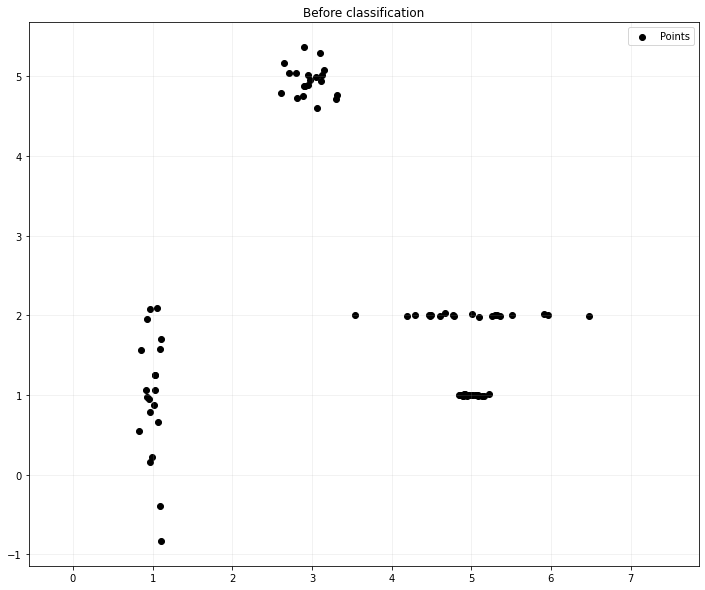

In [8]:
fig = plt.figure(figsize = (12,10))
plt.scatter(X.T[0], X.T[1], c='black',label = 'Points')
plt.axis('equal')
plt.grid(alpha=0.2)
plt.legend()
plt.title('Before classification')

#### Отметим начальное приближение центров кластеров

In [9]:
first_centers = np.array([[3,4],
                          [2,1],
                          [5,4],
                          [4,1]
                         ])

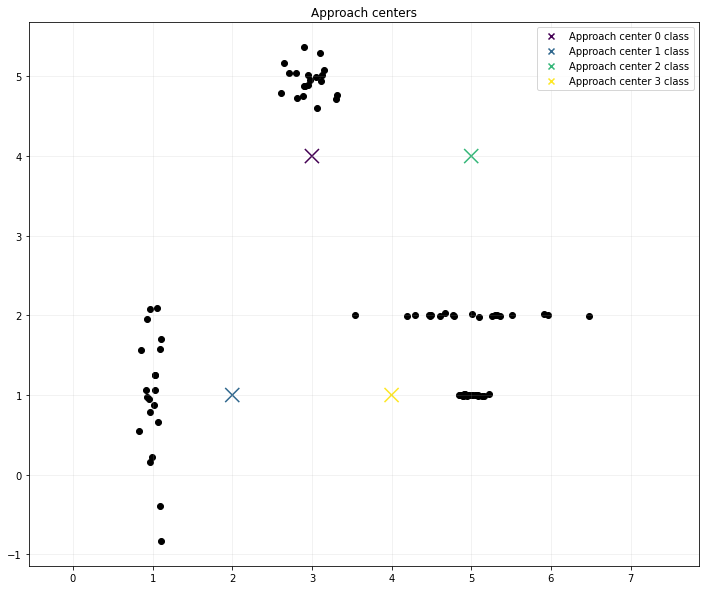

In [10]:
fig = plt.figure(figsize = (12,10))

scatter_d = plt.scatter(X.T[0], X.T[1], c='black', label = 'Points')

labels_c = [f'Approach center {i} class' for i in range(4)]

scatter_c = plt.scatter(first_centers.T[0], first_centers.T[1],
                        c =[i for i in range(len(first_centers))] , marker = 'x', s = 200)
plt.axis('equal')
plt.grid(alpha=0.2)
plt.legend(scatter_c.legend_elements()[0], labels_c)
plt.title('Approach centers')
plt.show()

#### Нарисуем диаграмму Воронова для начального приближения центров классов

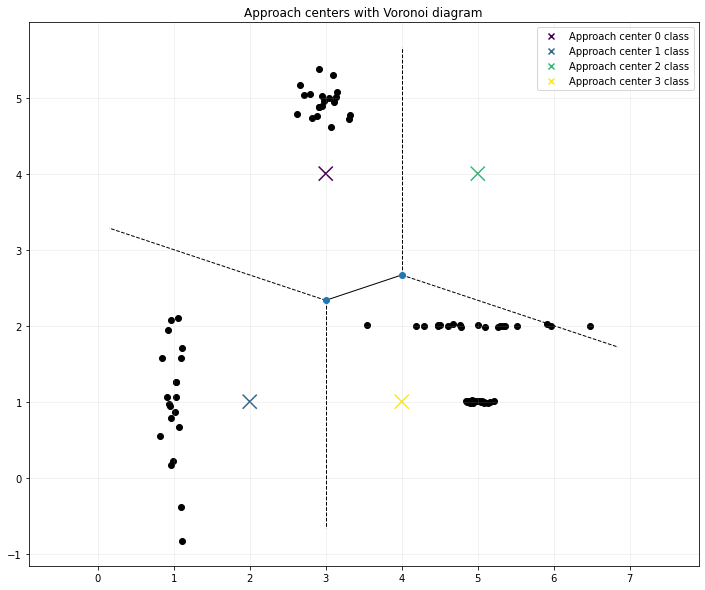

In [11]:
vor = Voronoi(first_centers)
fig = voronoi_plot_2d(vor,show_points=False)
fig.set_size_inches(12,10)

scatter_d = plt.scatter(X.T[0], X.T[1], c='black',label = 'Points')
labels_c = [f'Approach center {i} class' for i in range(4)]

scatter_c = plt.scatter(first_centers.T[0], first_centers.T[1],
                        c =[i for i in range(len(first_centers))] , marker = 'x', s = 200)
plt.axis('equal')
plt.grid(alpha=0.2)
plt.legend(scatter_c.legend_elements()[0], labels_c)
plt.title('Approach centers with Voronoi diagram')
plt.show()

 ## Метод $k$-средних
 
 Для начала создадим функцию, которая считает расстояние между точками.

In [12]:
def euclid_distance(x,y):
    return np.sqrt(((x-y)**2).sum(axis = -1))

Для нахождения центров кластеров нужно сначала запустить метод `fit`.  Потом можно получить метки кластеров при помощи метода `predict`. 

Метод `fit` будет сдвигать центры кластеров до тех пор, пока не пройдет `max_iter = 5`, либо пока максимальное расстояние между новыми центрами и старыми(прошлой итерации) не будет меньше `eps = 1e-5`.

In [13]:
class K_Means:
    """
    Метод k-средних
    классы -- это целые числа от 0 и больше
    """
    def __init__(self,distance = euclid_distance, max_iter = 15, eps = 1e-5):
        self.distance = distance
        self.max_iter = max_iter
        self.eps = eps
    
    def fit(self,X, centers):
        """
        Обучение модели. 
        На вход подаются точки для классификации, центры кластеров.
        """
        centers = centers.copy()
        old_centers = None
        it = 0
        while it < self.max_iter and (old_centers is None or 
                                      np.max(self.distance(old_centers, centers)) > self.eps):
            print(f'Iteration: {it}')
            labels = []
            for dot in X:
                labels.append(np.argmin(self.distance(centers, dot)))
            labels = np.array(labels)
            means = []
            for i in range(len(centers)):
                means.append(X[np.where(labels == i)].sum(axis = 0)/ (labels == i).sum())
            old_centers = centers
            centers = np.array(means)
#             print(centers - old_centers)
            it+=1
        self.centers = centers
    def predict(self,X):
        """
        Вход: Точки, что нужно разделить на классы
        Выход: список labels для точек
        """
        labels = []
        for dot in X:
            labels.append(np.argmin(self.distance(self.centers, dot)))
        return np.array(labels)        

#### Сделаем 1 итерацию алгоритма и выведем график

In [14]:
m_test = K_Means(max_iter = 1)
m_test.fit(X,first_centers)

Iteration: 0


Выведем расстояние на которое сдвинулись центры

In [15]:
euclid_distance(m_test.centers,first_centers)

array([0.94742461, 1.00290987, 2.48955641, 1.06260744])

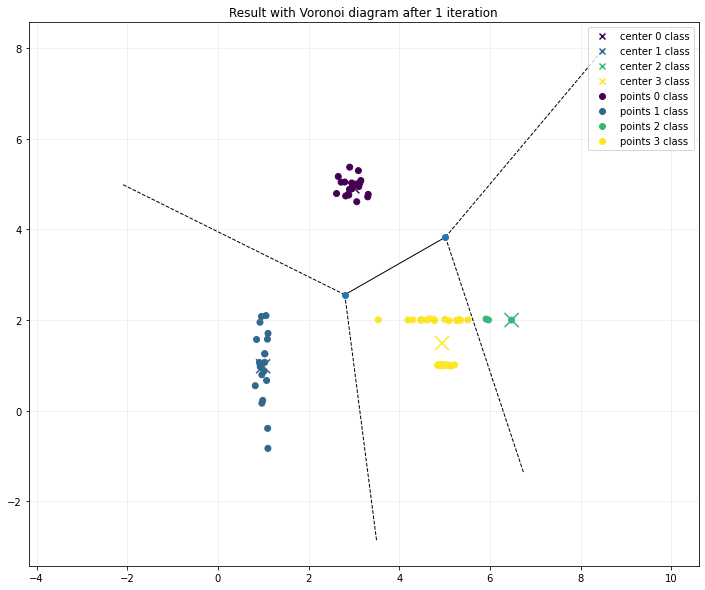

In [16]:
vor = Voronoi(m_test.centers)
fig = voronoi_plot_2d(vor,show_points=False)
fig.set_size_inches(12,10)

scatter_d = plt.scatter(X.T[0], X.T[1], label = 'Points', c = m_test.predict(X))
labels_c = [f'center {i} class' for i in range(4)]
labels_d = [f'points {i} class' for i in range(4)]

scatter_c = plt.scatter(m_test.centers.T[0], m_test.centers.T[1],
                        c =np.unique(m_test.predict(X)) , marker = 'x', s = 200)
plt.axis('equal')
plt.grid(alpha=0.2)
plt.legend(scatter_c.legend_elements()[0]+ scatter_d.legend_elements()[0], labels_c+labels_d)

plt.title('Result with Voronoi diagram after 1 iteration')
plt.show()

#### Теперь запустим алгоритм до конца

In [17]:
m = K_Means()
m.fit(X,first_centers)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6


Видим, что алгоритм сошелся за 7 шагов. Выведем координаты новых центров.

In [18]:
for index, center in enumerate(m.centers):
    print(f'Center of {index} class:',center)

Center of 0 class: [2.96574029 4.94680498]
Center of 1 class: [0.99733096 0.97802241]
Center of 2 class: [5.52204388 1.99921711]
Center of 3 class: [4.80252498 1.334205  ]


#### Выведем график

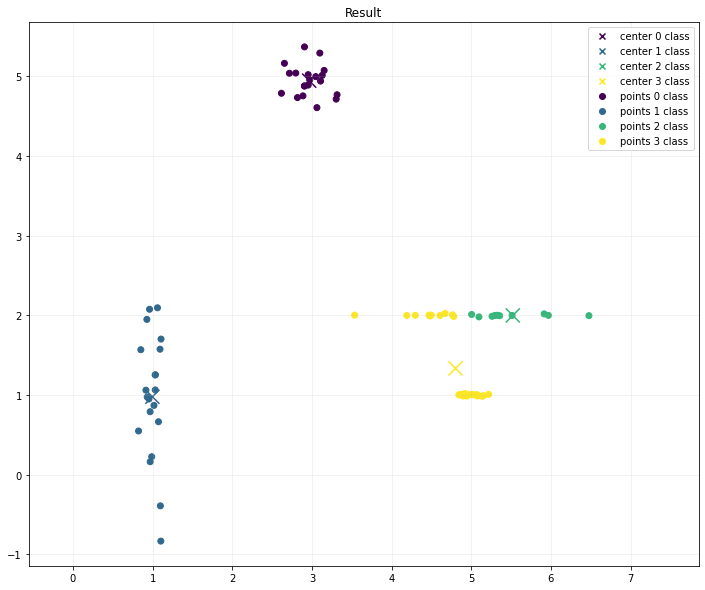

In [19]:
fig = plt.figure(figsize = (12,10))

scatter_d = plt.scatter(X.T[0], X.T[1], label = 'Points', c = m.predict(X))
labels_c = [f'center {i} class' for i in range(4)]
labels_d = [f'points {i} class' for i in range(4)]

scatter_c = plt.scatter(m.centers.T[0], m.centers.T[1], c =np.unique(m.predict(X)) , marker = 'x', s = 200)
plt.axis('equal')
plt.grid(alpha=0.2)
plt.legend(scatter_c.legend_elements()[0]+ scatter_d.legend_elements()[0], labels_c+labels_d)

plt.title('Result')
plt.show()

#### Выведем график с диаграммой Воронова

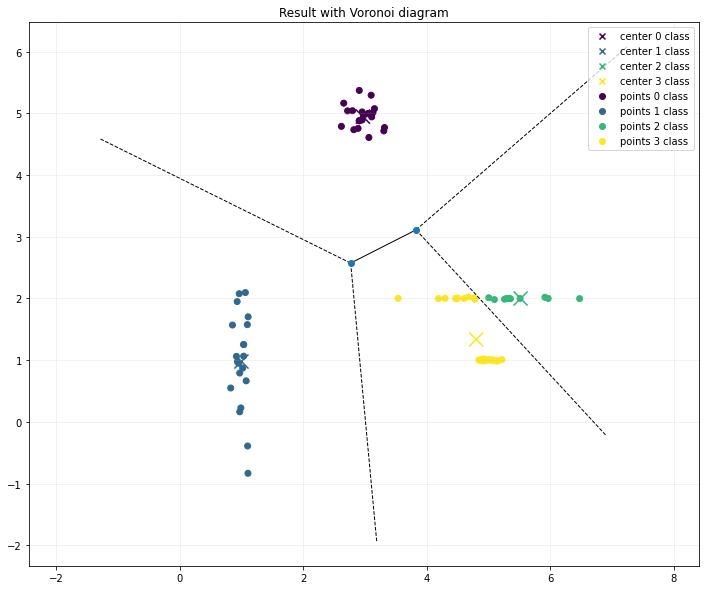

In [20]:
vor = Voronoi(m.centers)
fig = voronoi_plot_2d(vor,show_points=False)
fig.set_size_inches(12,10)

scatter_d = plt.scatter(X.T[0], X.T[1], label = 'Points', c = m.predict(X))
labels_c = [f'center {i} class' for i in range(4)]
labels_d = [f'points {i} class' for i in range(4)]

scatter_c = plt.scatter(m.centers.T[0], m.centers.T[1], c =np.unique(m.predict(X)) , marker = 'x', s = 200)
plt.axis('equal')
plt.grid(alpha=0.2)
plt.legend(scatter_c.legend_elements()[0]+ scatter_d.legend_elements()[0], labels_c+labels_d)

plt.title('Result with Voronoi diagram')
plt.show()

## Выводы

Метод $k$-средних  выполнился корректно, но из-за неудачно выбранных начальных приближений центров кластеров не смог точки на изначальные кластеры(заданные нормальные распределения).